In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob 

44
55
44
55


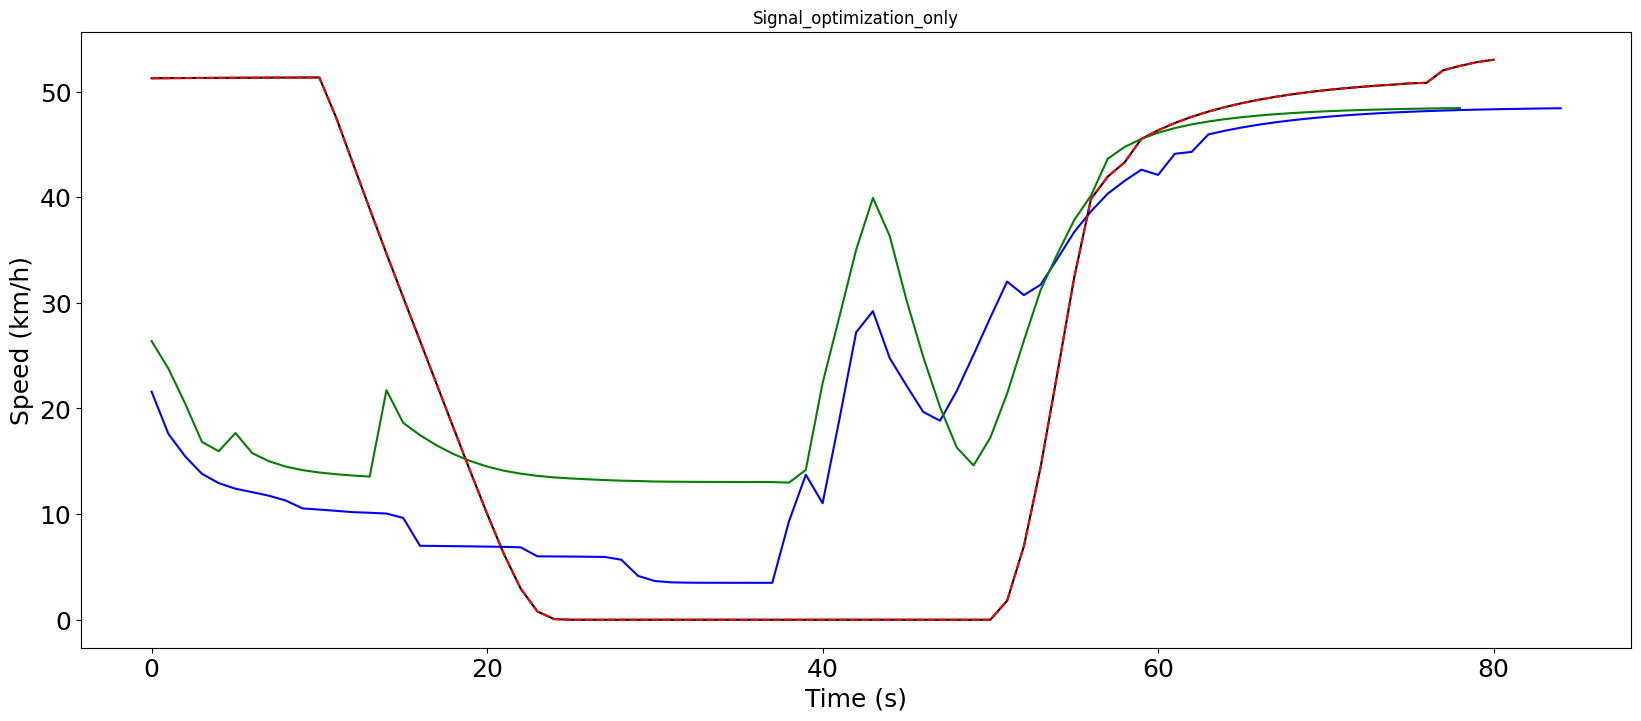

In [42]:
control_method = ["No_control", "Signal_optimization_only", "Eco-Driving_only", "Proposed_control"]
file_list = glob.glob('results/*.csv')
plot_sec_id = [1249, 1252] # plot distance vs time
numlane = [1, 2, 3]
plot_demand_percent = 100
plot_cav_percent = 50
plot_veh_idx = 30 # the vehicle index which we plot for (speed vs. time)

## vehicle type ID
# ICEV_CAV = 5380,
# ICEV_NON_CAV = 154,
# BEV_CAV = 5591,
# BEV_NON_CAV = 5590,
# HEV_CAV = 5596,
# HEV_NON_CAV = 5597,
# PHEV_CAV = 5592,
# PHEV_NON_CAV = 5593,
# HFCV_CAV = 5594,
# HFCV_NON_CAV = 5595
control_vehicle_type_id = 5380
non_control_vehicle_type_id = 154
# section id for the control node
section_dict = {'1249': [1252, 5325], '1272': [1270, 1784]}
control_sections_list = [int(i) for i in section_dict.keys()]


def fig_plot(veh_idx, control_idx, control_method, target_vehicle_trajctory):
    
    if control_idx == control_method[0]:
        color = 'k'
    elif control_idx == control_method[1]:
        color = 'r--'
    elif control_idx == control_method[2]:
        color = 'b'
    else:
        color = 'g'

    time = range(len(target_vehicle_trajctory['CurrentSpeed']))
    plt.plot(time, target_vehicle_trajctory['CurrentSpeed'], color)
    plt.xlabel('Time (s)', fontdict={'size':18, 'color':'black'})
    plt.ylabel('Speed (km/h)', fontdict={'size': 18})
    plt.title(str(control_idx))
    plt.xticks(fontsize = 18)
    plt.yticks(fontsize = 18)


plt.figure(figsize=(20,8))
for item in file_list:
    control_idx = item[8:item.find("_demand")]
    subname_1 = item[item.find('demand')+6:]
    demand_percent = int(subname_1[0:subname_1.find("_C")])
    subname_2 = item[item.find("CAV")+3:]
    cav_percent = int(subname_2[0:subname_2.find("_")])
    repli_id = subname_2[subname_2.find("_")+1:subname_2.find(".")] # last four digits are replication id

    # plot trajectory results only for one replication, CAV 10% and demand 10% under each control strategy
    if demand_percent == plot_demand_percent and cav_percent == plot_cav_percent:
        trajectory = pd.read_csv(item, delimiter='\t')

        # plot speed versus time
        cav_trajectory = trajectory[trajectory['veh_type_id'] == control_vehicle_type_id]
        cav_ids = cav_trajectory['vehicle_id'].unique()

        cnt_cav = 0 # control the id of the vehicle to be visualized
        
        for veh_idx in cav_ids:
            cnt_cav += 1
            if cnt_cav == plot_veh_idx:
                print(veh_idx)
                target_vehicle_trajctory = cav_trajectory[cav_trajectory['vehicle_id'] == veh_idx]
                empty_check = target_vehicle_trajctory['section_id'].isin(control_sections_list)
                
                if target_vehicle_trajctory[empty_check].empty: # remove those only on downstream sections
                    plot_veh_idx += 1 # if this vehicle only appears on downstream sections, remove it and move to plot the next vehicle
                    continue
                else:
                    fig_plot(veh_idx, control_idx, control_method, target_vehicle_trajctory)

                break
        
            else:
                continue

        # # plot distance versus time
        # filter_trajctory_by_time = trajectory[trajectory['simulation_time'].between(4000, 4500)]
        # vehicle_id = filter_trajctory_by_time.vehicle_id.unique()

        # for col_section, downstream_section in section_dict.items():
        #     col_section = int(col_section)
        #     # all distance2End on control sections should be multiplied by -1 to ensure vehicles trajectories go upward in the figure
        #     filter_trajctory_by_time.loc[filter_trajctory_by_time['section_id']==col_section, 'distance2End'] *= -1
        
        
        # reduced_trajectory = filter_trajctory_by_time[filter_trajctory_by_time.section_id.isin(plot_sec_id)]

        # plt.figure(figsize=(20,8))

        # for veh_id in vehicle_id:
        #     veh_id_df = reduced_trajectory[reduced_trajectory.vehicle_id == veh_id].sort_values('simulation_time')

        #     if veh_id_df['section_id'] not in np.array(plot_sec_id[0]): # do not plot trajectories for those which do not travel from the control section
        #         continue
            
        #     if control_vehicle_type_id in veh_id_df['veh_type_id'].unique():
        #         color = 'g'
        #     else:
        #         color = 'k--'
            
        #     veh_id_df = veh_id_df[veh_id_df['numberLane'].isin(numlane)]
        #     # error_check = error_check.append(veh_id_df)
        #     time = veh_id_df['simulation_time']
        #     plt.plot(time, veh_id_df['distance2End'], color)
        #     plt.xlabel('Time (s)', fontdict={'size':18, 'color':'black'})
        #     plt.ylabel('Distance to the stop line (m)', fontdict={'size': 18})
        #     plt.title(str(control_idx))
        #     plt.xticks(fontsize = 18)
        #     plt.yticks(fontsize = 18)

